In [13]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import time
from datetime import datetime
import matplotlib.pyplot as plt
# import seaborn as sns
import pickle
# print(ccxt.exchanges) # print a list of all available exchange classes

In [4]:
zaif = ccxt.zaif()
zaif.fetchTrades("BTC/JPY")

[{'amount': 0.0137,
  'datetime': '2017-08-28T11:53:45.000Z',
  'id': '64313704',
  'info': {'amount': 0.0137,
   'currency_pair': 'btc_jpy',
   'date': 1503921225,
   'price': 473290.0,
   'tid': 64313704,
   'trade_type': 'ask'},
  'price': 473290.0,
  'side': 'sell',
  'symbol': 'BTC/JPY',
  'timestamp': 1503921225000,
  'type': None},
 {'amount': 0.1,
  'datetime': '2017-08-28T11:53:45.000Z',
  'id': '64313703',
  'info': {'amount': 0.1,
   'currency_pair': 'btc_jpy',
   'date': 1503921225,
   'price': 473290.0,
   'tid': 64313703,
   'trade_type': 'ask'},
  'price': 473290.0,
  'side': 'sell',
  'symbol': 'BTC/JPY',
  'timestamp': 1503921225000,
  'type': None},
 {'amount': 0.001,
  'datetime': '2017-08-28T11:53:45.000Z',
  'id': '64313702',
  'info': {'amount': 0.001,
   'currency_pair': 'btc_jpy',
   'date': 1503921225,
   'price': 473290.0,
   'tid': 64313702,
   'trade_type': 'ask'},
  'price': 473290.0,
  'side': 'sell',
  'symbol': 'BTC/JPY',
  'timestamp': 1503921225000,
  

In [14]:
def create_df_trade_zaif(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append([csv_name,trade["id"],trade["datetime"],trade["info"]["amount"],trade["side"],trade["price"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=[csv_name,"id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [ ]:
i = 0
trade_dict={}
zaif = ccxt.zaif()
name = "zaif"
sleep_time = 1
while True:
#     if sleep_time > 1:
    time.sleep(sleep_time) # おこられる
    try:
        trades=zaif.fetchTrades("BTC/JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
        if sleep_time>1:
            sleep_time -= 1
        i += 1
    except Exception as e: 
        print(e)
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
        sleep_time = sleep_time + 1
    #     書き込み
    try:
        if i %10 == 0:
            print(i)
            create_df_trade_zaif(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except Exception as e: 
        print(e)
        print('Failed to write')
        with open(name+"_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

10


/home/take/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


20
30
40
50
60
70


In [6]:
len(trade_dict)

4407

In [58]:
dictlist = []
for key, value in trade_dict.items():
#     print(key,value)
    dictlist.append(value)

In [22]:
df_trade.head()

,coincheck,id,created_at,amount,order_type,rate
created_at,,,,,,
2017-08-26 05:13:59,coincheck,16473904,2017-08-26 05:13:59,0.014700,sell,471548
2017-08-26 05:13:59,coincheck,16473903,2017-08-26 05:13:59,0.008900,sell,471562
2017-08-26 05:14:01,coincheck,16473905,2017-08-26 05:14:01,0.008900,sell,471593
2017-08-26 05:14:01,coincheck,16473909,2017-08-26 05:14:01,0.111500,sell,471443
2017-08-26 05:14:01,coincheck,16473906,2017-08-26 05:14:01,0.000084,sell,471548


In [ ]:
df_trade.

In [19]:
type(df_trade["amount"][0])

str

In [23]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]

In [25]:
df_summary.head()

,amount
created_at,
2017-08-26 05:14:00,20.659907
2017-08-26 05:15:00,19.306314
2017-08-26 05:16:00,25.593196
2017-08-26 05:17:00,21.614201
2017-08-26 05:18:00,14.204539


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

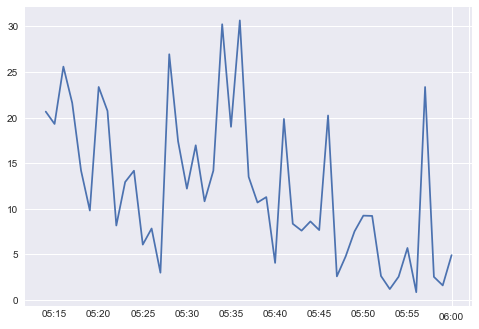

In [31]:
df_summary['amount'].plot()